## Twitter Data Analysis Homework
* Find out the sentiment of users regarding "China" on twitter. Create a sentiment trend chart for the last 7 days. 
* Get the tweets for each day and generate the sentiments for the all the tweets regarding the subject "China". Group by day and create a line chart for sentiments.

In [ ]:
# installing the library to fetch tweets
#!pip install tweepy

In [1]:
import tweepy
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [7]:
# Variables that contains the user specific credentials to access Twitter API
# Please create yours by going to https://developer.twitter.com/en 
access_token = "742308967-kp4bzK76uNQAoeWEdWRfml2Sg1RgiuYH"
access_token_secret = "XoyUWgmXVMdtDRKnlqzuSR9AROL4SvVFfQzkhEO"
consumer_key = "ddm3t2CZxOlgnwjJgwL5ULyD"
consumer_secret = "KoPrLJLM7pn6RK1t6bEbDY83R9v4WKx8ocr1czOGzrXMSgH"

## Creating logic to extract last 7 days tweets

In [16]:
# Finding a date 7 days ago from today
import datetime
str(datetime.datetime.now() - datetime.timedelta(10)).split()[0]

'2020-12-05'

In [9]:
# Generating last 7 day dates
for i in range(1,8):
    print('Start:', str(datetime.datetime.now() - datetime.timedelta(i)).split()[0], 
          'End:', str(datetime.datetime.now() - datetime.timedelta(i-1)).split()[0])

Start: 2020-12-11 End: 2020-12-12
Start: 2020-12-10 End: 2020-12-11
Start: 2020-12-09 End: 2020-12-10
Start: 2020-12-08 End: 2020-12-09
Start: 2020-12-07 End: 2020-12-08
Start: 2020-12-06 End: 2020-12-07
Start: 2020-12-05 End: 2020-12-06


## Finding tweets for last 7 days

In [10]:
# Connecting to twitter using user credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Creating an empty data frame to store the tweets
tweets = pd.DataFrame()

# Specifying the keyword to search 
SearchKeyword='Petrol'

# Generating last 7 day dates
for i in range(1,8):
    # Searching about any keyword in all the latest tweets
    tweets_data=api.search(q=SearchKeyword,count=500, lang='en', include_rts=False, tweet_mode="extended",
                           since=str(datetime.datetime.now() - datetime.timedelta(i)).split()[0], 
                           until=str(datetime.datetime.now() - datetime.timedelta(i-1)).split()[0])
    print ("number of tweets found: "+ str(len(tweets_data)))


    # Extracting the tweet metadata
    for status in tweets_data:
        tweets=tweets.append(status._json, ignore_index=True)

number of tweets found: 100
number of tweets found: 100
number of tweets found: 100
number of tweets found: 100
number of tweets found: 100
number of tweets found: 100
number of tweets found: 100


In [17]:
tweets.shape

(700, 31)

In [18]:
# Looking at the data collected
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,retweeted,retweeted_status,source,truncated,user,quoted_status_id,quoted_status_id_str,extended_entities,possibly_sensitive,quoted_status
0,None,None,Fri Dec 11 23:59:27 +0000 2020,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 ...,None,1.337548e+18,...,0.0,{'created_at': 'Fri Dec 11 13:51:51 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 117615965, 'id_str': '117615965', 'name...",NaN,NaN,NaN,NaN,NaN
1,None,None,Fri Dec 11 23:57:29 +0000 2020,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 ...,None,1.337547e+18,...,0.0,{'created_at': 'Fri Dec 11 13:51:51 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 707932981415915520, 'id_str': '70793298...",NaN,NaN,NaN,NaN,NaN
2,None,None,Fri Dec 11 23:57:28 +0000 2020,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 ...,None,1.337547e+18,...,0.0,{'created_at': 'Fri Dec 11 13:51:51 +0000 2020...,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4113671418, 'id_str': '4113671418', 'na...",NaN,NaN,NaN,NaN,NaN
3,None,None,Fri Dec 11 23:56:35 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @JamesBurdass: @BikeBishopstone @MBTom_co_u...,None,1.337547e+18,...,0.0,{'created_at': 'Fri Dec 11 23:51:54 +0000 2020...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,"{'id': 20464672, 'id_str': '20464672', 'name':...",NaN,NaN,NaN,NaN,NaN
4,None,None,Fri Dec 11 23:55:50 +0000 2020,"[16, 262]","{'hashtags': [], 'symbols': [], 'user_mentions...",1.0,0.0,@Mickey58630673 They ain't gonna sell that on ...,None,1.337547e+18,...,0.0,NaN,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 951411151723692033, 'id_str': '95141115...",NaN,NaN,NaN,NaN,NaN


In [28]:
# Looking at only the tweet texts
tweets['full_text'].unique()

(412,)

## Sentiment analysis
Using bag of textblob model, finding the sentiment of every tweet found

In [20]:
import textblob
textblob.TextBlob('this is so good!').polarity

0.875

In [21]:
# Funtion to find the sentiment score for each tweet
def ComputeSentimentScore(inpTweet):
    SentimentScore=textblob.TextBlob(inpTweet).polarity
    return(SentimentScore)
    
# Function to find the sentiment bucket for each tweet
def ComputeSentimentBucket(inpScore):
    if(inpScore>0):
        return('Postitive')
    elif(inpScore<0):
        return('Negative')
    else:
        return('Neutral')

In [27]:
# Calling sentiment score function for every tweet
tweets['SentimentScore']=tweets['full_text'].apply(ComputeSentimentScore)

# Finding the sentiment for every tweet
tweets['Sentiment']=tweets['SentimentScore'].apply(ComputeSentimentBucket)


# Printing sample rows to understand
print(tweets.shape)
tweets[['full_text', 'Sentiment','SentimentScore']].head()

(700, 33)


,full_text,Sentiment,SentimentScore
0,RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 ...,Neutral,0.000000
1,RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 ...,Neutral,0.000000
2,RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 ...,Neutral,0.000000
3,RT @JamesBurdass: @BikeBishopstone @MBTom_co_u...,Neutral,0.000000
4,@Mickey58630673 They ain't gonna sell that on ...,Negative,-0.171212


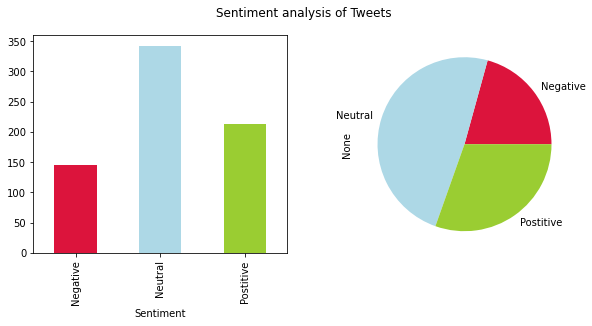

In [26]:
# Visualizing the overall sentiment distribution
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Tweets")

# Grouping the data
GroupedData=tweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue','yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue','yellowgreen'])

# Trend line for daily sentiments

In [30]:
# Creating a date column using timestamp
tweets['TweetDate']=pd.DatetimeIndex(tweets['created_at']).date
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,truncated,user,quoted_status_id,quoted_status_id_str,extended_entities,possibly_sensitive,quoted_status,SentimentScore,Sentiment,TweetDate
0,None,None,Fri Dec 11 23:59:27 +0000 2020,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 ...,None,1.337548e+18,...,0.0,"{'id': 117615965, 'id_str': '117615965', 'name...",NaN,NaN,NaN,NaN,NaN,0.000000,Neutral,2020-12-11
1,None,None,Fri Dec 11 23:57:29 +0000 2020,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 ...,None,1.337547e+18,...,0.0,"{'id': 707932981415915520, 'id_str': '70793298...",NaN,NaN,NaN,NaN,NaN,0.000000,Neutral,2020-12-11
2,None,None,Fri Dec 11 23:57:28 +0000 2020,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 ...,None,1.337547e+18,...,0.0,"{'id': 4113671418, 'id_str': '4113671418', 'na...",NaN,NaN,NaN,NaN,NaN,0.000000,Neutral,2020-12-11
3,None,None,Fri Dec 11 23:56:35 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @JamesBurdass: @BikeBishopstone @MBTom_co_u...,None,1.337547e+18,...,0.0,"{'id': 20464672, 'id_str': '20464672', 'name':...",NaN,NaN,NaN,NaN,NaN,0.000000,Neutral,2020-12-11
4,None,None,Fri Dec 11 23:55:50 +0000 2020,"[16, 262]","{'hashtags': [], 'symbols': [], 'user_mentions...",1.0,0.0,@Mickey58630673 They ain't gonna sell that on ...,None,1.337547e+18,...,0.0,"{'id': 951411151723692033, 'id_str': '95141115...",NaN,NaN,NaN,NaN,NaN,-0.171212,Negative,2020-12-11


In [32]:
# Creating a daily aggregate of tweets sentiments
DailySentimentAvg=tweets.groupby('TweetDate').mean()['SentimentScore']
DailySentimentAvg

TweetDate
2020-12-05    0.039720
2020-12-06    0.055740
2020-12-07    0.013438
2020-12-08    0.014111
2020-12-09    0.053213
2020-12-10    0.134902
2020-12-11    0.029745
Name: SentimentScore, dtype: float64

# Daily Sentiment Trend chart 

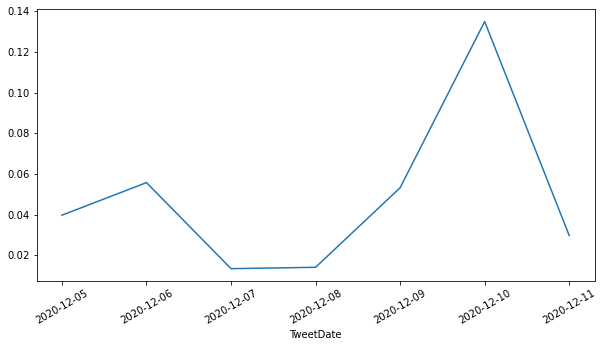

In [33]:
# Plotting The above data
DailySentimentAvg.plot(figsize=(10,5),rot=30)

## Wordcloud analysis

In [34]:
# Extracting only the Tweet text
Tweet_Texts=tweets['full_text'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

In [35]:
# Observing the tweets text for junk
print(Tweets_String)

['RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 SL: 63\n🇧🇩 Bangladesh: 77\n🇮🇳 India: 90\n\nGDP Growth 2020-21\n🇧🇩 Bangladesh: 5.2%\n🇵🇰 Pak: -0.4%\n🇱🇰…'
 'RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 SL: 63\n🇧🇩 Bangladesh: 77\n🇮🇳 India: 90\n\nGDP Growth 2020-21\n🇧🇩 Bangladesh: 5.2%\n🇵🇰 Pak: -0.4%\n🇱🇰…'
 'RT @srivatsayb: PETROL Rate ₹\n🇵🇰 Pak: 46\n🇱🇰 SL: 63\n🇧🇩 Bangladesh: 77\n🇮🇳 India: 90\n\nGDP Growth 2020-21\n🇧🇩 Bangladesh: 5.2%\n🇵🇰 Pak: -0.4%\n🇱🇰…'
 'RT @JamesBurdass: @BikeBishopstone @MBTom_co_uk @HowardCCox @FairFuelUK @transportgovuk @TheABD @Iromg @Tony_Devenish 2/2 The UK is just 1%…'
 "@Mickey58630673 They ain't gonna sell that on any grounds, the statement about EV, s and petrol and diesel being dirty words has put a spanner on that one never mind price hikes, Can see lease and PCP being the thing, wouldn't buy anything new for long term now."
 'Imagine waking up one morning and deciding to start calling yourself vin diesel. So from now on i’m called Tim Petrol'
 'RT @irfhabi

### Data Preprocessing: Cleaning the text

In [36]:
# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)


# Deleting any word which is less than 4-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,3}\b', ' ', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

# Printing some words from cleaned tweets
Tweet_Texts_Cleaned[0:500]

' petrol rate bangladesh india ngdp growth bangladesh petrol rate bangladesh india ngdp growth bangladesh petrol rate bangladesh india ngdp growth bangladesh just they gonna sell that grounds statement about petrol diesel being dirty words spanner that never mind price hikes lease being thing wouldn anything long term imagine waking morning deciding start calling yourself diesel from called petrol petrol close litre quiet national interest currently have petrol pump cars amount fast chargers need'

### Generating the wordcloud

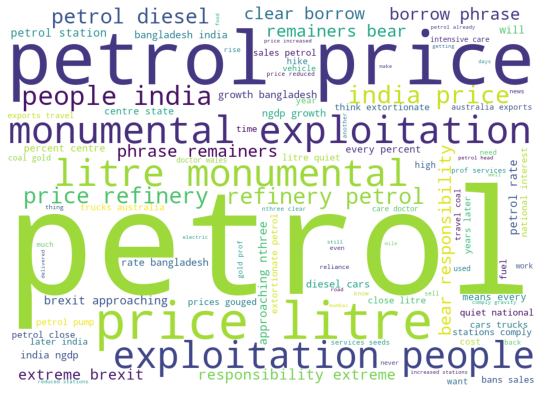

In [37]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt

# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['corona','virus','day','https','govt','covid']

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

## Bigram/Trigram Wordcloud using textblob

##### Important word combinations ####
rt_petrol_rate_n_pak_n_sl_n_bangladesh_n_india_n_ngdp_growth_n_bangladesh_n_pak_n_rt_petrol_rate_n_pak_n_sl_n_bangladesh_n_india_n_ngdp_growth_n_bangladesh_n_pak_n_rt_petrol_rate_n_pak_n_sl_n_bangladesh_n_india_n_ngdp_growth_n_bangladesh_n_pak_n_rt ain_t_gon_na ev_s dirty_words mind_price_hikes thing_wouldn_t long_term vin_diesel i_m tim_petrol_rt_petrol national_interest petrol_pump fast_chargers petrol_pumps_don_t petrol_delivery_infrastructure_rt_petrol_rate_n_pak_n_sl_n_bangladesh_n_india_n_


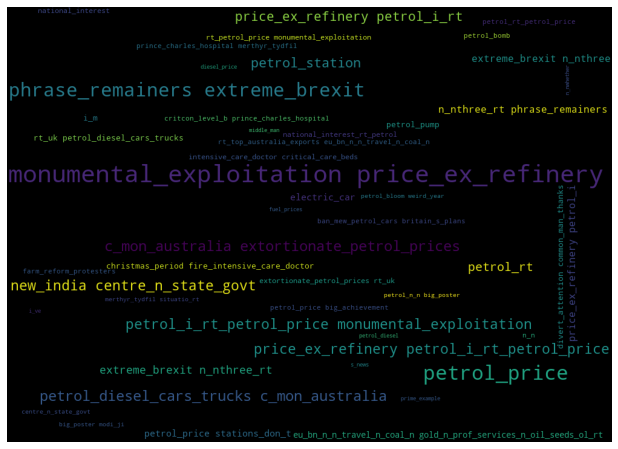

In [38]:
# Textblob library installation
#!pip install textblob

# installing the wordcloud library
# !pip install wordcloud

# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)

# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)


# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

########################################################################
# Finding the important word combinations using textblob
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(Tweet_Texts_Cleaned)

# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString[0:500])

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['don_t','china_s','rt_china', 'realizes_china']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='white',
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

# Translation Using TextBlob

In [13]:
from textblob import TextBlob
text = TextBlob(open("C:/Users/amna/Downloads/Farmers' Produce Trade and Commerce bill, 2020.pdf","r",encoding='latin1').read())
text

TextBlob("%PDF-1.7
%âãÏÓ
1 0 obj
<</Type /Catalog
/Outlines 2 0 R
/Pages 16 0 R
>>
endobj
2 0 obj
<</Type /Outlines
/Count 1
/Last 57 0 R
/First 42 0 R
>>
endobj
3 0 obj
<</Type /Page
/Resources <</ExtGState <</GS1 5 0 R
/GS2 6 0 R
>>
/Font <</TT2 7 0 R
/TT6 10 0 R
/TT4 13 0 R
>>
/ProcSet [/PDF /Text]
>>
/Parent 16 0 R
/MediaBox [0 0 595 842]
/CropBox [0 0 595 842]
/Rotate 0
/Contents 4 0 R
>>
endobj
4 0 obj
<</Length 1463
/Filter /FlateDecode
>>
stream
H|WÉrÛ8½ë+úHNE0Ûä$/Ix+sHÅ9Ðd1¡HIYåßðe~wºI¹Ê±ôòúõ|òq-à¡¦³4À!ÝÎ¸ôD0QAºÙYø£4§_ÇÃÝôÇì"µ
.|\s2)
8îC£fÛ
<ð%;y2Á
qð	~ä3!§îç
ó¼XP4
$§P¾9àÎ¹`¾~ºnÄYì,VW«õùÛÕÍù?gàrÎ']-Îq
Ðxq}g7W¸ï
Üxu.o®ÝïéçYÄ	sÎÐã¹q
Îß8'
nÀ={äùly¹LÝ@Ñ!
öî\8]^^¾á	Oí³0ß÷Y
{3ú1S Î)ÍEút¤+ÄàóÀ
¦àÏÉ
i/VX¾­0

"htÌóCíy¾´û®Ç¦~*6
¶uÝNAÞ¨¬+ê
ê-d¨¼nÛNíá¸SÒ[¶Y³WMËèlCcUý¨iÌàJ¶È
ëÏßm£Ô¦Þ|W¹BÎè¹z ªÍJ¥í?
|µöY¿ÞÕB²À5º!û2EÆc¾æ`|±9`Ç]ï´9yØSãùmeÑej1îý¡R
Æþ¤Ð
¦Ò"M}xØA^ï

In [11]:
text.translate(to='hi')

HTTPError: HTTP Error 403: Forbidden